## CS677 Lab1 (Part2)

In [1]:
from PIL import Image
import requests

In [2]:
# Library Operations

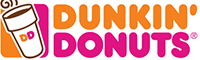

In [3]:
url = 'http://people.bu.edu/kalathur/Dunkin-Donuts.png'
im = Image.open(requests.get(url, stream=True).raw)
im

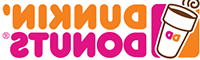

In [4]:
out = im.transpose(Image.FLIP_LEFT_RIGHT)
out

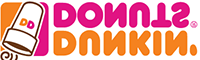

In [5]:
out = im.transpose(Image.FLIP_TOP_BOTTOM)
out

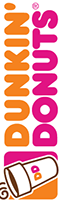

In [6]:
out = im.transpose(Image.ROTATE_90)
out

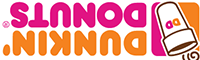

In [7]:
out = im.transpose(Image.ROTATE_180)
out

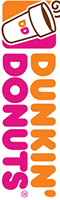

In [8]:
out = im.transpose(Image.ROTATE_270)
out

### Example1

In [10]:
url = 'http://people.bu.edu/kalathur/Dunkin-Donuts.png'
logo = Image.open(requests.get(url, stream=True).raw)
print(logo)

<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=200x60 at 0x111C7A7F0>


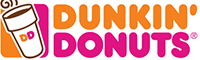

In [11]:
logo

In [14]:
print("format={} size={} mode={}".format(logo.format, logo.size, logo.mode))

format=PNG size=(200, 60) mode=RGBA


In [17]:
img_width, img_height = logo.size
print(img_width, img_height)

200 60


In [16]:
orig_pixels = list(logo.getdata())

print(len(orig_pixels), orig_pixels[0], orig_pixels[1000], orig_pixels[-1])

12000 (255, 255, 255, 255) (224, 215, 208, 255) (255, 255, 255, 255)


### Make the image 25% opaque

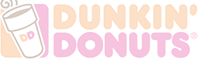

In [18]:
logo2 = logo.copy()
pixels = list(logo2.getdata())

for index in range(len(pixels)):
    r,g,b,a = pixels[index][0],  pixels[index][1],  pixels[index][2], pixels[index][3]
    pixels[index] = ( r, g, b, int(0.25*a))
    
logo2.putdata(pixels)
logo2

## TODO - With List comprehension

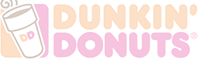

In [59]:
logo2 = logo.copy()
# use orig_pixels in code

# Fill in the code
pixels = [ (r, g, b, int(0.25*a)) for (r,g,b,a) in orig_pixels ]  # Marty

logo2.putdata(pixels)
logo2

**Alternate solution using 2D loop**

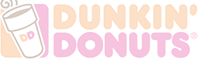

In [60]:
logo2 = logo.copy()
pixels = list(logo2.getdata())

for row in range(img_height):
    for col in range(img_width):
        index = row * img_width + col
        pixels[index] = ( pixels[index][0],  pixels[index][1],  pixels[index][2], \
                         int(0.25*pixels[index][3]))

logo2.putdata(pixels)
logo2

### Inverting the image

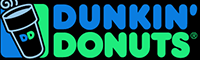

In [61]:
logo2 = logo.copy()
pixels = list(logo2.getdata())

for index in range(len(pixels)):
    pixels[index] = ( 255 - pixels[index][0],  255 - pixels[index][1],  \
                     255 - pixels[index][2], pixels[index][3])
    
logo2.putdata(pixels)
logo2

## TODO - With List comprehension

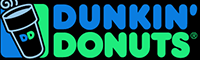

In [62]:
# With List comprehension

logo2 = logo.copy()
# use orig_pixels in code

# Fill in the code
pixels = [ (255-r, 255-g, 255-b, a) for (r,g,b,a) in orig_pixels ] # Marty

logo2.putdata(pixels)
logo2

### Grayscale of the image - TODO (Loop and list comprehension)
 - (R * 299 + G * 587 + B * 114)/1000

[(255, 255, 255, 255), (135, 135, 135, 255), (17, 17, 17, 255), (86, 86, 86, 255), (220, 220, 220, 255), (255, 255, 255, 255), (255, 255, 255, 255), (255, 255, 255, 255), (255, 255, 255, 255), (172, 172, 172, 255)]


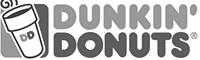

In [173]:
logo2 = logo.copy()
pixels = list(logo2.getdata())

# Use a single for loop with range

# Fill in the code
for index in range(len(pixels)): # Marty (enumerate would have been easier)
    r,g,b,a = pixels[index]
    brightness = int(((r * 299) + (g * 587) + (b * 114)) / 1000)
    pixels[index] = (brightness, brightness, brightness, pixels[index][3])
print(pixels[0:10])

logo2.putdata(pixels)
logo2

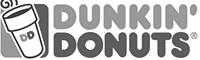

In [182]:
# With List comprehension

logo2 = logo.copy()
# use orig_pixels in code

# Fill in the code
pixels = [((299*r + 587*g + 114*b)//1000, )*3 + (a,) for (r,g,b,a) in orig_pixels]
logo2.putdata(pixels)
logo2

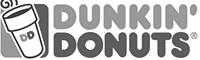

In [131]:
# With map and lambda function

logo2 = logo.copy()

# map(fun, iter)
# fun : It is a function to which map passes each element of given iterable.
# iter : It is a iterable which is to be mapped.
    
pixels = list(map(lambda p: 
               ( (299 * p[0] + 587 * p[1] + 114 *  p[2])//1000, )*3 + (p[3],), 
                  orig_pixels))

logo2.putdata(pixels)
logo2

## Fold the image in half

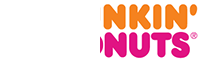

In [23]:
logo2 = logo.copy()
pixels = list(logo2.getdata())

for index in range(len(pixels)):
    row = index // img_width
    col = index % img_width
    if (col < img_width//2):
        pixels[index] = ( 255, 255, 255, pixels[index][3])
    
logo2.putdata(pixels)
logo2

## TODO -  Fold the image diagonally

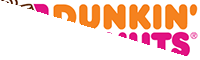

In [188]:
logo2 = logo.copy()
pixels = list(logo2.getdata())

# y = mx + b  # row = y, col = x
# m = (y - b) / x
m = (img_height - 0) / img_width

for index in range(len(pixels)):
    row = index // img_width
    col = index % img_width

    # Fill in the code
    if row >= (col * m):
        pixels[index] = ( 255, 255, 255, pixels[index][3])

        
logo2.putdata(pixels)
logo2

## TODO -  Flip vertically

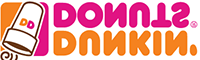

In [156]:
logo2 = logo.copy()
pixels = list(logo2.getdata())

for row in range(img_height//2):
    top = row
    bottom = img_height - row - 1

    for col in range(img_width):
        # Fill in the code
        pixels[(top * img_width) + col], pixels[(bottom * img_width) + col] = \
            pixels[(bottom * img_width) + col], pixels[(top * img_width) + col]

logo2.putdata(pixels)
logo2

## Mirror top half vertically

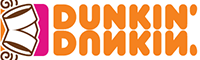

In [26]:
logo2 = logo.copy()
pixels = list(logo2.getdata())

for row in range(img_height//2):
    for col in range(img_width):
        
        top_index = row * img_width + col
        bot_index = (img_height - row - 1) * img_width + col
        
        pixels[bot_index] = pixels[top_index]
        
logo2.putdata(pixels)
logo2

### Mirror full image vertically

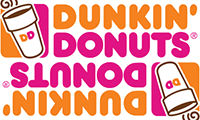

In [165]:
logo2 = logo.copy()
pixels = list(logo2.getdata())

# new image with twice the height

logo3   = Image.new(logo.mode, (img_width, 2 * img_height)) # mrc
# logo3   = Image.new(logo.mode, (logo.size[0], 2 * logo.size[1])) mrc

pixels3 = pixels + pixels[::-1]

logo3.putdata(pixels3)
logo3

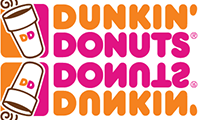

In [164]:
logo2 = logo.copy()
pixels = list(logo2.getdata())

# new image with twice the height

logo3   = Image.new(logo.mode, (img_width, 2 * img_height))  # mrc
# logo3   = Image.new(logo.mode, (logo.size[0], 2 * logo.size[1])) mrc
pixels3 = pixels + pixels

for row in range(img_height):
    for col in range(img_width):
        
        top_index = row * img_width + col
        bot_index = (2 * img_height - row - 1) * img_width + col
        
        pixels3[bot_index] = pixels3[top_index]

logo3.putdata(pixels3)
logo3

### Rotation 90 degrees clockwise

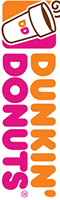

In [169]:
img_width, img_height = logo.size
logo2 = logo.copy()
pixels = list(logo2.getdata())

logo3   = Image.new(logo.mode, (img_height, img_width))
#logo3   = Image.new(logo.mode, (logo.size[1], logo.size[0]))

pixels3 = list(logo3.getdata())

for row in range(img_height):
    for col in range(img_width):
        
        old_index = row * img_width + col
        new_index = img_height * col + (img_height - row - 1)
        pixels3[new_index] = pixels[old_index]

logo3.putdata(pixels3)
logo3        

### Rotation 90 degrees anticlockwise

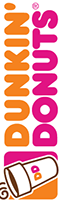

In [170]:
img_width, img_height = logo.size
logo2 = logo.copy()
pixels = list(logo2.getdata())

logo4   = Image.new(logo.mode, (img_height, img_width))
#logo4   = Image.new(logo.mode, (logo.size[1], logo.size[0]))
pixels4 = list(logo4.getdata())

for row in range(img_height):
    for col in range(img_width):
        
        old_index = row * img_width + col
        new_index = (img_width - col - 1)  * img_height + row
        pixels4[new_index] = pixels[old_index]

logo4.putdata(pixels4)
logo4       